In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def f1(t):
    return np.sin(t**2 - 6*t + 3)

def f2(t):
    return np.sin(np.sin(t) * (t**2))

def output_signal(t):
    return 0.25 * np.sin(np.sin(t) * (t**2) - np.pi)

## Задание 1

In [4]:
time1 = np.linspace(0, 6, int(6/0.025) + 1)
time2 = np.linspace(0, 3.5, int(3.5/0.01))
x1 = f1(time1)
x2 = f2(time2)
y = output_signal(time1)
y2 = output_signal(time2)

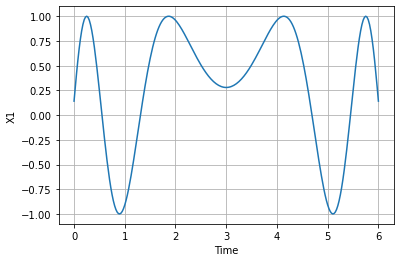

In [5]:
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X1')
plt.plot(time1, x1)

In [6]:
def adaline(X, y, rate=0.01, delays=5, epoches=50):
    data = np.array([np.hstack([1, X[i:i+delays]]) for i in range(len(X) - delays)])
    w = np.random.uniform(-0.1, 0.1, delays + 1)
    # print(f'Y: {y}')
    for _ in range(epoches):
        out = data @ w
        err = y - out
        # print(f'OUT: {out}')
        # print(f'W: {w}')
        w += rate * data.T @ err
    a = data @ w
    return w, a, ((a - y)**2).sum() / len(data)

In [7]:
w1, a, mse = adaline(x1, x1[5:], 0.0004)

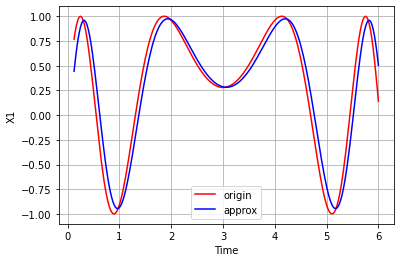

In [8]:
# print(x1)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X1')
plt.plot(time1[5:], x1[5:], 'r', label='origin')
plt.plot(time1[5:], a, 'b', label='approx')
plt.legend()

In [9]:
print(f'MSE = {np.sqrt(mse)}')

MSE = 0.1567832547702115


## Задание 2

In [10]:
w2, a, mse = adaline(x1, x1[3:], 0.00055, delays=3, epoches=600)

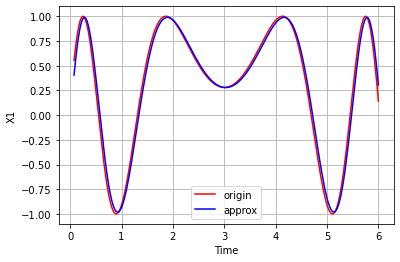

In [11]:
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X1')
plt.plot(time1[3:], x1[3:], 'r', label='origin')
plt.plot(time1[3:], a, 'b', label='approx')
plt.legend()

In [12]:
print(f'MSE = {np.sqrt(mse)}')

MSE = 0.06673467182504025


In [13]:
x_test = np.array([6 + 0.0025 * i for i in range(1, 11)])

[0.42511837 0.28687934 0.14112001 0.16203991 0.14081744 0.14972557
 0.14617774 0.14926096 0.14921474 0.15071229 0.15144284 0.15253117
 0.15342583]


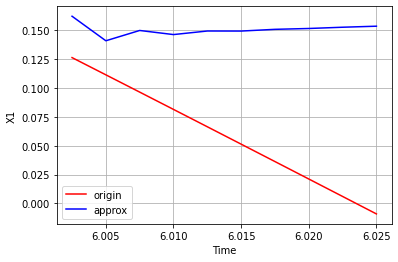

In [14]:
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X1')
plt.plot(x_test, f1(x_test), 'r', label='origin')
tmp_x = x1[-3:]
for i in range(10):
    tmp_x = np.append(tmp_x, np.hstack([1, tmp_x[-3:]])@w2)
print(tmp_x)
plt.plot(x_test, tmp_x[3:], 'b', label='approx')
plt.legend()

## Задание 3

In [15]:
w3, a, mse = adaline(x2, y2[3:], 0.00055, delays=3, epoches=600)

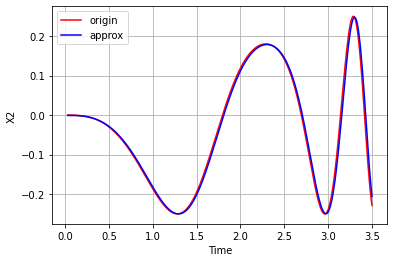

In [16]:
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X2')
plt.plot(time2[3:], y2[3:], 'r', label='origin')
plt.plot(time2[3:], a, 'b', label='approx')
plt.legend()

In [17]:
print(f'MSE = {np.sqrt(mse)}')


RMSE = 0.012097892046773109
